![QuantConnect Logo](https://cdn.quantconnect.com/web/i/logo-small.png)
# QuantConnect Alpha Streams
#### Licensed Under QuantConnect Platform Service Agreement v1.0. Copyright QuantConnect 2018.
#### For more information; see the Open API Specification of Alpha Streams: https://app.swaggerhub.com/apis/QuantConnect/Alpha/0.4

## Introduction

QuantConnect Alpha Streams allows quantiative funds to search a database of algorithm authors; and instantly license the authors' strategies (`Alpha`). The license agreements and fee structure is already prenegotiated, and the standardized backtesting and live trading infrastructure can give funds confidence in the algorithm results. Upon licensing an Alpha the insights/signals are instantly delivered to the fund in realtime.

## Terminology
 - `Alpha`     - Strategy for licensing.
 - `Author`    - QuantConnect member and creator of the Alpha. 
 - `Insight`   - Trade signal from an algorithm; consisting of an asset, direction, magnitude and confidence.
 - `Project`   - Properties of the project which submitted the `Alpha` 

## SDK Demonstration


### 1. Setup the SDK: Login with Client Credentials
We have written a full abstraction and SDK for the API which you can quickly import into your investment process. To start create a new instance of the `AlphaStreamClient` with your clientId and token.

In [1]:
# Import Python SDK Client Library 
from AlphaStreamClient import AlphaStreamClient 

# Define the clientId and API access token:
clientId  = "c7bd966e930c4b15b2ec13eb0d6170d9"
token     = "7030e89cfcc1948f4f93e91edd93d6f687c737844a6969d99d609a78f8d0a5c4091ef11f31c4c0e9cccacefe36ff4c2ad0e15525a85c65b0eafa34064cd11b1c"

# Define the QuantConnect user id and token (this is needed to perform backtest in QuantConnect.com)
userId    = 484
userToken = '90d636983c418d8f0e3498d646668554'

# Create a new instance of the client module:
client = AlphaStreamClient(clientId, token, userId, userToken)

### 2. Listing all Alpha Strategies For Licensing
Listing all alpha ids so you can maintain a dictionary and detect programatically when a new alpha is added to the API.

In [2]:
# List all alphas:
print(client.GetAlphaList())

['118d1cbc375709792ea4d823a', '2d3db6308e0086b2dd28c0512', '5443d94e213604f4fefbab185']


### 3. Searching Alpha Strategies For Licensing
The primary aim of the Alpha Streams API is to quickly search for Alpha which matches your criteria. This criteria is unique to your fund and might include such aspects as: asset class, time horizon, risk adjusted return or market depth. Alpha Streams API aims to give you flexibility you need to locate suitable algorithms.

In [3]:
# Import Alpha Search Request Requirements
from Requests.SearchAlphasRequest import SearchAlphasRequest

# Define search criteria
projectId = 830918

# Submit Search:
alphas = client.SearchAlphas( projectId = projectId, sharedFeeMinimum = 10 )

# Display some information on the algorithms:
for a in alphas:
    print(f"Alpha: id: {a.Id} Project: '{a.Project.Name}' Fee: ${a.SharedSubscriptionFee:,.2f}/mo")

In [4]:
# Import Alpha Search Request Requirements
from Requests.SearchAlphasRequest import SearchAlphasRequest

# Submit Search:
alphas = client.SearchAlphas( includedTags = ['author trading'], excludedTags = ['cool'] )

# Display some information on the algorithms:
for a in alphas:
    print(f"Alpha: id: {a.Id} Project: '{a.Project.Name}' Fee: ${a.SharedSubscriptionFee:,.2f}/mo Tags : ${a.Tags}")

Alpha: id: 2d3db6308e0086b2dd28c0512 Project: 'Alpha/Rebalancing Leveraged ETF Alpha' Fee: $39.00/mo Tags : $['author trading']


#### 3.1 Verify the alpha prices and create a new bid
Once you found an interesing alpha stream, you can retrieve its recent price history and make a bid

In [5]:
prices = client.GetAlphaQuotePrices('5443d94e213604f4fefbab185')
for price in prices:
    print(price)

Ask price from 2018-08-15 23:30:34: Shared $39.00.
Bid price from 2018-11-24 01:08:26: Shared $9.99.
Bid price from 2018-11-24 01:08:31: Shared $9.99.
Bid price from 2018-11-27 02:42:42: Shared $9.99.
Bid price from 2018-11-27 02:43:12: Shared $9.99.
Bid price from 2018-11-28 01:31:49: Shared $9.99.
Ask price from 2018-11-28 19:08:08: Shared $39.00.
Ask price from 2018-11-28 20:23:17: Shared $9.99.
Ask price from 2018-11-28 20:24:07: Shared $39.00.
Ask price from 2018-11-28 20:26:06: Shared $9.99.
Bid price from 2018-11-29 19:03:46: Shared $6.99.


In [6]:
from datetime import datetime, timedelta

client.CreateBid(
    alphaId = '5443d94e213604f4fefbab185',
    shared = 7,
    good_until = datetime.utcnow() + timedelta(1)
)

'Bid price was successfully created.'

### 4. Pull Information on an Alpha By Specific AlphaId
You can fetch information on an alpha by its associated id with the `/alpha/{id}` API endpoint.

In [7]:
# Prospective / Test Alpha Id:
alphaId = "5443d94e213604f4fefbab185"
alpha = client.GetAlphaById( alphaId )

# Print out the Alpha data:
print(f'''Alpha Id: {alpha.Id}
    Project: {alpha.Project.Name}
    ExclusiveAvailable: {alpha.ExclusiveAvailable}
    Listed: {alpha.ListedTime}''')

Alpha Id: 5443d94e213604f4fefbab185
    Project: Alpha/Forex Calendar Alpha v1.01
    ExclusiveAvailable: True
    Listed: 2018-08-15 23:30:34


### 5. Get Last 5 Insights of an Alpha
All historical insights of an Alpha are recorded in a database. Insights are generated `in sample`, `out of sample` or in `live trading`. Using these insights you can perform your own backtests with your own fill and slippage models to see how the strategy would have performed with your execution.

In [8]:
# Import the Insights Request Class:
from Requests.GetAlphaInsightsRequest import GetAlphaInsightsRequest

# Request Insights for the Previously Alpha
insights = client.GetAlphaInsights( alphaId, start = 10000 )

# Take Top 5:
for i in insights[:10]:
    magnitude = "" if i.Magnitude is None else " by {i.Magnitude:.2%}"
    print(f"{i.CreatedTime} Alpha {i.Source} {i.Type} insight for {i.Ticker:<10} going {i.Direction}{magnitude} over the next {i.Period}s")

2008-08-15 19:45:00 Alpha in sample price insight for xlf        going up over the next 86400s
2009-09-10 19:45:00 Alpha in sample price insight for xlf        going up over the next 86400s
2012-02-27 20:45:00 Alpha in sample price insight for xlf        going up over the next 86400s
2015-08-25 19:45:00 Alpha in sample price insight for xlf        going up over the next 86400s
2011-09-22 19:45:00 Alpha in sample price insight for xlf        going up over the next 86400s
2009-03-04 20:45:00 Alpha in sample price insight for xlf        going up over the next 86400s
2014-04-08 19:45:00 Alpha in sample price insight for xlf        going up over the next 86400s
2018-06-15 19:45:00 Alpha in sample price insight for xlf        going up over the next 86400s
2012-05-30 19:45:00 Alpha in sample price insight for xlf        going up over the next 86400s
2014-05-16 19:45:00 Alpha in sample price insight for xlf        going up over the next 86400s


### 6. Seach Alpha Streams by Author Details
Knowing who created the Alpha can be an important search tool to improve your filtering. Participating Author information can be searched in a similar manner to the Alpha Search. Each supplied criteria is a logical AND on the query.

In [9]:
languages = ["Py"]

authors = client.SearchAuthors( languages = languages, location = "New York" )

print(f"Located {len(authors)} authors matching your criteria.")

for a in authors[:5]:
    print(f"Alpha Stream Author {a.Id[:5]:>5} is from {a.Location}. Signed up {a.SignUpTime} and codes in {a.Language}")

Located 5 authors matching your criteria.
Alpha Stream Author 1675c is from New York, New York, US. Signed up 2018-01-30 23:50:50 and codes in Py
Alpha Stream Author 3c516 is from New York, New York, US. Signed up 2018-04-02 03:28:59 and codes in Py
Alpha Stream Author 708e6 is from New York, New York, US. Signed up 2017-04-13 02:22:31 and codes in Py
Alpha Stream Author 73cb0 is from Hicksville, New York, US. Signed up 2018-04-09 22:29:27 and codes in Py
Alpha Stream Author ac037 is from New York, New York, US. Signed up 2016-04-06 19:13:57 and codes in Py


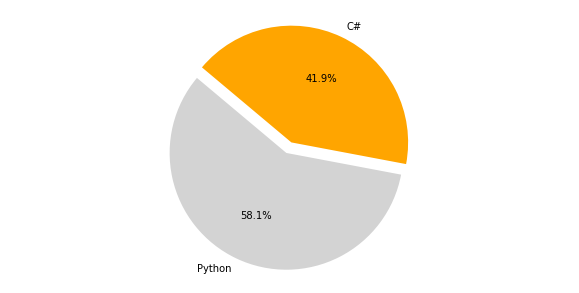

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
sizes = [len(client.SearchAuthors( languages = "Py")), len(client.SearchAuthors( languages = "C#"))]
plt.figure(figsize=(10,5))
plt.pie(sizes, explode=(0.1, 0), labels= ['Python', 'C#'], colors=['lightgrey', 'orange'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

### 7. Fetch Detailed Information on a Specific Author
The API allows you to fetch detailed information on a specific author by the hash-id.

In [11]:
# Author to fetch profile information about:
authorId = "1f48359f6c6cbad65b091232eaae73ce"

# Submit request for more information:
author = client.GetAuthorById(authorId)

# Print out the Alpha data:
print(f'''Author Id: {author.Id[:5]}
    Biography: {author.Biography[:50]}...
    Projects: {author.Projects}
    Language: {author.Language}
    Signed Up: {author.SignUpTime}
    Location: {author.Location}''')

Author Id: 1f483
    Biography: I'm part of the QuantConnect Engineering team. I h...
    Projects: 265
    Language: C#
    Signed Up: 2015-03-28 20:10:29
    Location: Southampton, Pennsylvania, US


### 8. Subscribing and Unsubscribing from An Alpha
Once you've located an Alpha you need to subscribe to it to recieve its streaming insights. Alphas have a monthly licensing fee which is engaged once you request its signals. There is a minimum fee equivalent to 7 days of licensing from an Alpha. Sending a subscription request starts delivery of the signals to the fund-exchange.

In [ ]:
# Alpha to subscribe to:
alphaId = "392a40ccab3740287a1c30bc6"

unsubscribeResult = client.Unsubscribe( alphaId )
print(f"Stopped Subscription to {alphaId}: {unsubscribeResult}")

In [ ]:
subscribeResult = client.Subscribe( alphaId )
print(f"Started Subscription to {alphaId}: {subscribeResult}")

### 9. Stream Insights from An Alpha
Finally once analysed and subscribed to an Alpha - you can pull down the individual insights with the streaming socket connection. This is to use the insights in realtime in your fund management.

In [ ]:
# Import the streaming client helper library
from AlphaInsightsStreamClient import AlphaInsightsStreamClient

# Configure authentication details
ipaddress = "35.231.13.1"
user = "demo-api"
password = "demo"
virtualhost = "demo-client"
exchange = "QCAlphaExchange_Demo-Client"
queueName = alphaId
routingKey = alphaId

# Create the streaming client tool:
streamClient = AlphaInsightsStreamClient(user, password, ipaddress, virtualhost, exchange)

print("Streaming insights for 5 seconds... ")

# StreamSynchronously pulls down Insights for a minimum timeout in a blocking manner.
for i in streamClient.StreamSynchronously( alphaId, timeout=10 ):
    print(f"{i.Created} Alpha {i.Source} {i.Type} insight for {i.Ticker:<10} going {i.Direction} by {i.Magnitude:.2%} over the next {i.Period}s")

print("Streaming completed.")
    

In [12]:
alphaId = "392a40ccab3740287a1c30bc6"

prices = client.GetAlphaPrices(alphaId, start = 0)

# Take Top 5:
for i in prices[:10]:
    print(f"{i.PriceType.title()} price from {i.Time}, shared ${i.SharedPrice:,.2f} and the exclusive ${i.ExclusivePrice:,.2f}")

Ask price from 2018-07-23 16:53:04, shared $104,000.00 and the exclusive $104,000.00
Ask price from 2018-08-05 16:25:26, shared $13,000.00 and the exclusive $13,000.00
Ask price from 2018-08-09 04:19:29, shared $13,000.00 and the exclusive $32,500.00


In [13]:
alphaId = "392a40ccab3740287a1c30bc6"

errors = client.GetAlphaErrors(alphaId, start = 0)

# Take Top 5:
for i in errors[:10]:
    print(f"Error at {i.Time}, error message: {i.Error[:10]}, stacktrace: {i.Stacktrace[:10]}") 

Error at 2018-09-22 00:07:52, error message: Algorithm., stacktrace:   at Quant
Error at 2018-09-22 00:07:54, error message: Algorithm., stacktrace: 
Error at 2018-09-22 00:08:49, error message: Algorithm., stacktrace:   at Quant
Error at 2018-09-22 00:08:54, error message: Algorithm., stacktrace: 


### 10. Run the backtest for a given alpha

In [14]:
alpha_id = '118d1cbc375709792ea4d823a'
backtest = client.GetAlphaBacktest(alpha_id)

22:21:15.629230 :: Get or create project
22:21:18.184393 :: Project: AlphaBacktest_118d1cbc375709792ea4d823a (1906575)
22:21:18.184393 :: Compile and create backtest
22:21:20.447361 :: CompileId: bfc69e9a652373937fa73cc7c5193fcd-d15d360995e61b50b673893358f8c1ca
22:21:25.570650 :: Backtest: 2018-10-12 22:21:20.447361 (0f3b3008e18242e6f683374854f70da4)
22:21:46.067510 :: Reading backtest result: 0.00% completed
22:22:05.397780 :: Reading backtest result: 5.60% completed
22:22:06.540728 :: Reading backtest result: 21.00% completed
22:22:16.620744 :: Reading backtest result: 31.30% completed
22:22:26.517259 :: Reading backtest result: 36.60% completed
22:22:36.787774 :: Reading backtest result: 46.80% completed
22:22:46.951574 :: Reading backtest result: 51.80% completed
22:22:56.803219 :: Reading backtest result: 62.60% completed
22:23:06.795453 :: Reading backtest result: 67.80% completed
22:23:17.108852 :: Reading backtest result: 78.40% completed
22:23:27.054238 :: Reading backtest res

In [15]:
# Print statistics
backtest.Statistics

{'Total Trades': '634',
 'Average Win': '0.06%',
 'Average Loss': '-0.02%',
 'Compounding Annual Return': '2.540%',
 'Drawdown': '0.400%',
 'Expectancy': '1.082',
 'Net Profit': '8.470%',
 'Sharpe Ratio': '1.747',
 'Loss Rate': '42%',
 'Win Rate': '58%',
 'Profit-Loss Ratio': '2.61',
 'Alpha': '0.048',
 'Beta': '-1.721',
 'Annual Standard Deviation': '0.012',
 'Annual Variance': '0',
 'Information Ratio': '0.359',
 'Tracking Error': '0.012',
 'Treynor Ratio': '-0.012',
 'Total Fees': '$0.00'}

In [17]:
# Print orders
backtest.Orders.head(5)

,Time,SecurityType,Symbol,PriceCurrency,Quantity,Direction,Price,Type,Status,Tag,LastFillTime
Id,,,,,,,,,,,
1,2015-07-17 14:00:00,Forex,USDJPY 8G,JPY,-166249,Sell,124.05200,Market,Filled,,2015-07-17 14:00:00
2,2015-07-17 14:00:00,Forex,USDCAD 8G,CAD,-166250,Sell,1.29873,Market,Filled,,2015-07-17 14:00:00
3,2015-07-17 14:00:00,Forex,EURUSD 8G,USD,153141,Buy,1.08573,Market,Filled,,2015-07-17 14:00:00
4,2015-07-17 14:00:00,Forex,AUDUSD 8G,USD,225466,Buy,0.73750,Market,Filled,,2015-07-17 14:00:00
5,2015-07-17 14:00:00,Forex,GBPUSD 8G,USD,106743,Buy,1.55785,Market,Filled,,2015-07-17 14:00:00


In [19]:
# Print closed trades
backtest.ClosedTrades.head(5)

,Symbol,Quantity,Direction,EntryPrice,ExitPrice,ExitTime,Duration,EndTradeDrawdown,MAE,MFE,ProfitLoss,TotalFees
EntryTime,,,,,,,,,,,,
2015-07-17 14:00:00,USDJPY 8G,166249,Sell,124.05200,124.04100,2015-07-17 14:06:00,00:06:00,-12.07,-12.06,26.81,14.74,0
2015-07-17 14:00:00,USDCAD 8G,166250,Sell,1.29873,1.29932,2015-07-17 14:06:00,00:06:00,-75.50,-124.12,0.00,-75.50,0
2015-07-17 14:00:00,AUDUSD 8G,225466,Buy,0.73750,0.73723,2015-07-17 14:06:00,00:06:00,-60.88,-145.43,0.00,-60.88,0
2015-07-17 14:00:00,EURUSD 8G,153141,Buy,1.08573,1.08544,2015-07-17 14:06:00,00:06:00,-44.41,-150.08,0.00,-44.41,0
2015-07-17 14:00:00,GBPUSD 8G,106743,Buy,1.55785,1.55712,2015-07-17 14:06:00,00:06:00,-77.92,-167.05,0.00,-77.92,0


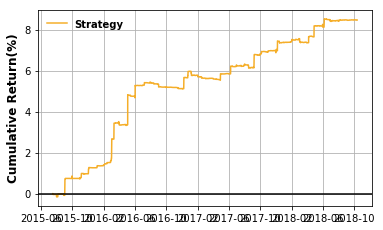

In [21]:
# Plot Equity curve (see Charts attribute for more)
%matplotlib inline
import matplotlib.pyplot as plt

df = backtest.Charts['Strategy Equity']['Equity']
df = ((df / df.iloc[0] - 1) * 100)

plt.figure()
ax = df.plot(color = ["#F5AE29","grey"])
fig = ax.get_figure()
plt.xticks(rotation = 0,ha = 'center')
plt.xlabel("")
plt.ylabel('Cumulative Return(%)',size = 12,fontweight='bold')
ax.legend(["Strategy","Benchmark"],prop = {'weight':'bold'},frameon=False, loc = "upper left")
plt.axhline(y = 0, color = 'black')
ax.grid()

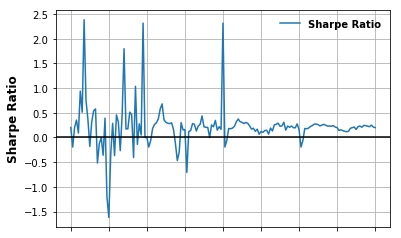

In [22]:
# Plot Sharpe Ratio curve (see RollingWindow attribute for more)
%matplotlib inline
import matplotlib.pyplot as plt

df = backtest.RollingWindow['SharpeRatio']

plt.figure()
ax = df.plot()
fig = ax.get_figure()
plt.xticks(rotation = 0,ha = 'center')
plt.xlabel("")
plt.ylabel('Sharpe Ratio',size = 12,fontweight='bold')
ax.legend(['Sharpe Ratio'],prop = {'weight':'bold'},frameon=False, loc = "upper right")
plt.axhline(y = 0, color = 'black')
ax.grid()

### 11. Create a conversation thread.
Start a conversation with the author(s) of the alpha via email. Quickly solve reconciliation issues or design automated filter questions.    

In [ ]:
client.CreateConversation(
    alphaId = "118d1cbc375709792ea4d823a",
    email = "you@your-company.com",
    message = "Hello World!",
    subject = "Alpha Conversation",
    cc = "bot1@your-company.com, bot2@your-company.com, bot2@your-company.com"
)